# Physik in der Klimatologie - Beispiele 

In [1]:
%pip install -q ipywidgets
%pip install -q ipympl
%pip install -q pandas

In [1]:
from sandboxlib import *
%matplotlib ipympl
_ = plt.ioff()

In [2]:
print("Hallo Python.")

Hallo Python.


In [3]:
import warnings
warnings.filterwarnings("ignore")

## Das Plancksche Strahlungsgesetz, Boltzmann und Wien

Das Plancksche Strahlungsgesetz gibt für die Wärmestrahlung eines schwarzen Körpers die Verteilung der elektromagnetischen Strahlungsleistung an, und zwar als Funktion der Wellenlänge $\lambda$ (in m) bzw. der Frequenz $\nu$ (in s$^{-1}$) sowie der Oberflächentemperatur $T$ (in K).

Für unsere Darstellung nutzen wir die sogenannte Wellenlängendarstellung für die spektrale spezifische Ausstrahlung M$_{\lambda}^0$($\lambda$, T), siehe https://de.wikipedia.org/wiki/Plancksches_Strahlungsgesetz.

$M_{\lambda}^0(\lambda, T)\,dA\,d\lambda =  \frac{2\pi hc^2}{\lambda^5} \frac{1}{e^{hc/\lambda k T}-1} dA\,d\lambda$

- k = 1.380649e-23 (Boltzmann-Konstante, in J/K)
- h = 6.62607015e-34 (Planck-Konstante, in Js)
- c = 299792458  (Lichtgeschwindigkeit, in m/s)

Wenn wir nicht über eine Oberfläche A und das gesamte Wellenlängenspektrum $\lambda$ integrieren, können wir $dA\,d\lambda$ eliminieren. Die resultierende Einheit für $M_{\lambda}^0(\lambda, T)$ ist $\frac{W}{m^2 m}$. Wenn man wie üblich die spektrale Ausstrahlung in Abhängigkeit von $\lambda$  in der Einheit µm darstellen will, muss man das Ergebnis noch mit 10$^6$ multiplizieren.

Integrieren wir die über das gesamte Wellenlängensprektrum der Wärmestrahlung, erhalten wir das Stefan-Boltzmann-Gesetz, welches die Ausstrahlungsflussdichte eines Schwarzen Strahlers in Abhängigkeit von T beschreibt.

$M^0(T)\,dA = \sigma \cdot T^4\,dA$

- $\sigma$ = 5.670374419e-8 (Stefan-Boltzmann-Konstante, in W/m²/K⁴)

Die Wellenlänge $\lambda_{max}$ (in m), für welche $M_{\lambda}^0(\lambda, T)$ maximal wird, wird hingegen durch das Wiensche Verschiebungsgesetz beschrieben, welches sich ebenfalls aus dem Ausdruck für $M_{\lambda}^0(\lambda, T)$ herleiten lässt.

$\lambda_{max} = \frac{2897.8 \cdot 10^{-6}}{T}$



In [4]:
# Konstanten
k = 1.380649e-23 # J/K
h = 6.62607015e-34 # Js
c = 299792458 # m/s
sigma = 5.670374419e-8 # W/m²/K⁴
wienconst = 2897.8e-6 # m / K

In [5]:
# Funktionen
def planckl(lam, T):
    return (2*np.pi*h*c**2/lam**5) * (1 / ( np.exp(h*c/(lam*k*T)) - 1 ))
def lambdamax(T):
    return wienconst / T
def boltzmann(T):
    return sigma * T**4
def make_planck_labels(T):
    x1 = boltzmann(T)
    x2 = lambdamax(T)*1e6
    t = "T=%d K -> M$^0$(T)=%.1E W/m², $\lambda_{max}$=%.1f µm" % (T, x1, x2)
    return t

interactive(children=(IntSlider(value=100, description='T', layout=Layout(width='85%'), max=10000, min=10, ste…

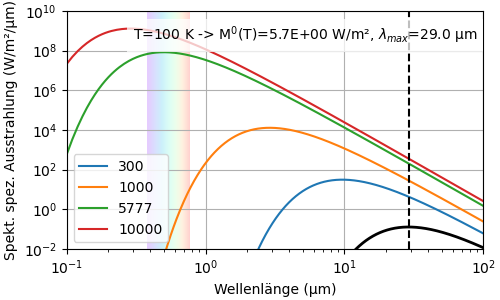

In [10]:
fig, ax = plt.subplots(1,1, num=" ", constrained_layout=True, figsize=(5,3))

grid = np.linspace(0, 1, 100).reshape((-1,100))
plt.imshow(grid, extent=(0.38, 0.78, 1e-2, 1e10), cmap=plt.cm.rainbow, alpha=0.2)

lam = np.arange(0.1,100,0.01)*1e-6
v = c/lam
for T in [300, 1000, 5777, 10000]:
    #plt.plot(lam*1e6, planck(v, T))
    plt.plot(lam*1e6, planckl(lam, T)*1e-6, label="%d" % T)
plt.legend(loc="lower left")
Tinit = 278
line, = plt.plot(lam*1e6, planckl(lam, Tinit)*1e-6, color="black", lw=2)
vline = plt.axvline(lambdamax(Tinit)*1e6, color="black", ls="--")
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1e-2,1e10)
plt.xlim(0.1, 100)
plt.xlabel("Wellenlänge (µm)")
plt.ylabel("Spekt. spez. Ausstrahlung (W/m²/µm)")
plt.grid()
ax.set_aspect(2/14)

text = plt.text(0.3, 0.2e10, make_planck_labels(Tinit), 
                ha="left", va="top", color="black")
text.set_bbox(dict(facecolor='white', alpha=0.75, edgecolor='None'))

def update(T): 
    #line.set_ydata(sim.Q)
    #optional preventing autoscaling of y-axis 
    ax.autoscale(False)
    #create invisible dummy object to extract the vertices
    line.set_ydata(planckl(lam, T)*1e-6)
    vline.set_xdata([lambdamax(T)*1e6])
    text.set_text(make_planck_labels(T))
    fig.canvas.draw_idle()

Tw = widgets.IntSlider(value=100, min=10, max=10000, step=10,
                       layout=widgets.Layout(width='85%'))
w = widgets.interact(update, 
                     T=Tw)

plt.show()